In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("../../data/tech-companies.csv")

In [3]:
df.head()


,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB
None


In [5]:
print(df.isnull().sum())
# we have no null values

Ranking       0
Company       0
Market Cap    0
Stock         0
Country       0
Sector        0
Industry      0
dtype: int64


In [6]:
df['Market Cap']

0       $2.866 T
1       $2.755 T
2       $1.186 T
3      $495.95 B
4      $487.64 B
         ...    
995     $825.4 M
996     $819.5 M
997     $819.3 M
998     $816.1 M
999     $811.5 M
Name: Market Cap, Length: 1000, dtype: object

In [7]:
# Function to extract the suffix (e.g., "T", "B","M") from the market cap
def extract_suffix(market_cap):
    if isinstance(market_cap, str):
        return market_cap[-1]  # Extract the last character (e.g., "T", "B","M")
    return None

# Apply the function to the 'Market Cap' column and get the unique suffixes
suffixes = df['Market Cap'].apply(extract_suffix).unique()

print(suffixes)

['T' 'B' 'M']


In [14]:
# convert the market cap suffex into their suitable numric values and remove the $ sign (convert all to billions)

def convert_market_cap(market_cap):
    if 'T' in market_cap:
        return float(market_cap.replace('$', '').replace('T', '').strip()) * 1e12 / 1e9  # divinde by billions
    elif 'B' in market_cap:
        return float(market_cap.replace('$', '').replace('B', '').strip()) # no need to to do anything here 
    elif 'M' in market_cap:
        return float(market_cap.replace('$', '').replace('M', '').strip()) * 1e6 / 1e9 # divide by billions
    else:
        return None

In [15]:
df['Market Cap Numeric'] = df['Market Cap'].apply(convert_market_cap)

In [16]:
df.head()

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry,Market Cap Numeric
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics,2866.00
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure,2755.00
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors,1186.00
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors,495.95
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors,487.64


In [45]:
Sectors = df['Sector'].unique()
print(Sectors)

['Technology']


In [46]:
Industries = df['Industry'].unique()
print(Industries)

['Consumer Electronics' 'Software—Infrastructure' 'Semiconductors'
 'Semiconductor Equipment & Materials' 'Software—Application'
 'Information Technology Services' 'Communication Equipment'
 'Scientific & Technical Instruments' 'Computer Hardware'
 'Electronic Components' 'Solar' 'Electronics & Computer Distribution']


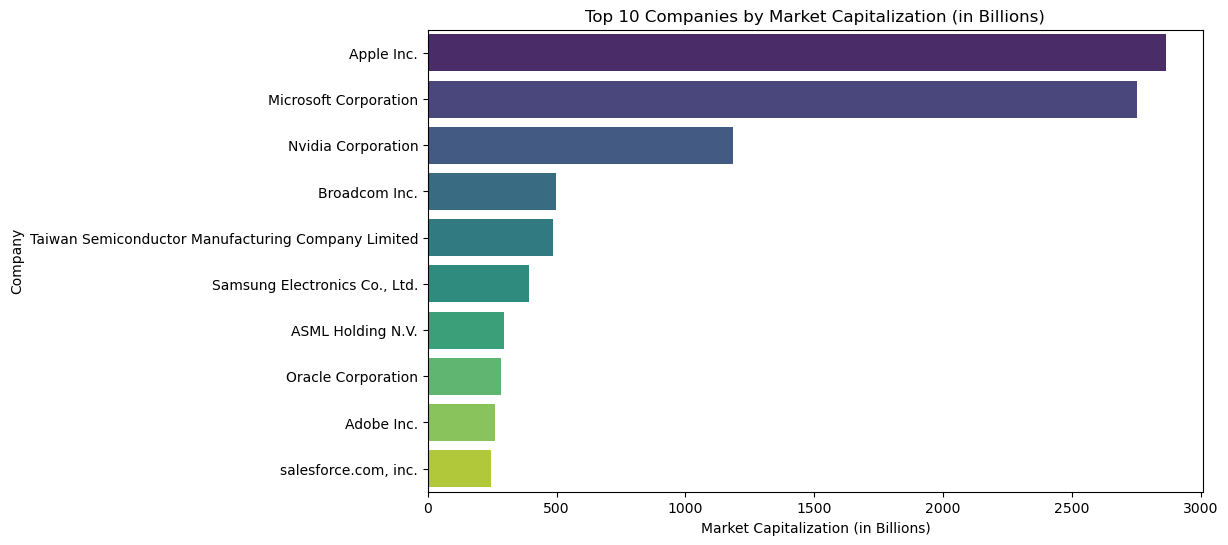

In [17]:
top_10 = df[['Company', 'Market Cap Numeric']].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Market Cap Numeric', y='Company', data=top_10, palette='viridis')
plt.title('Top 10 Companies by Market Capitalization (in Billions)')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Company')
plt.show()

# Apple hold the largest market share

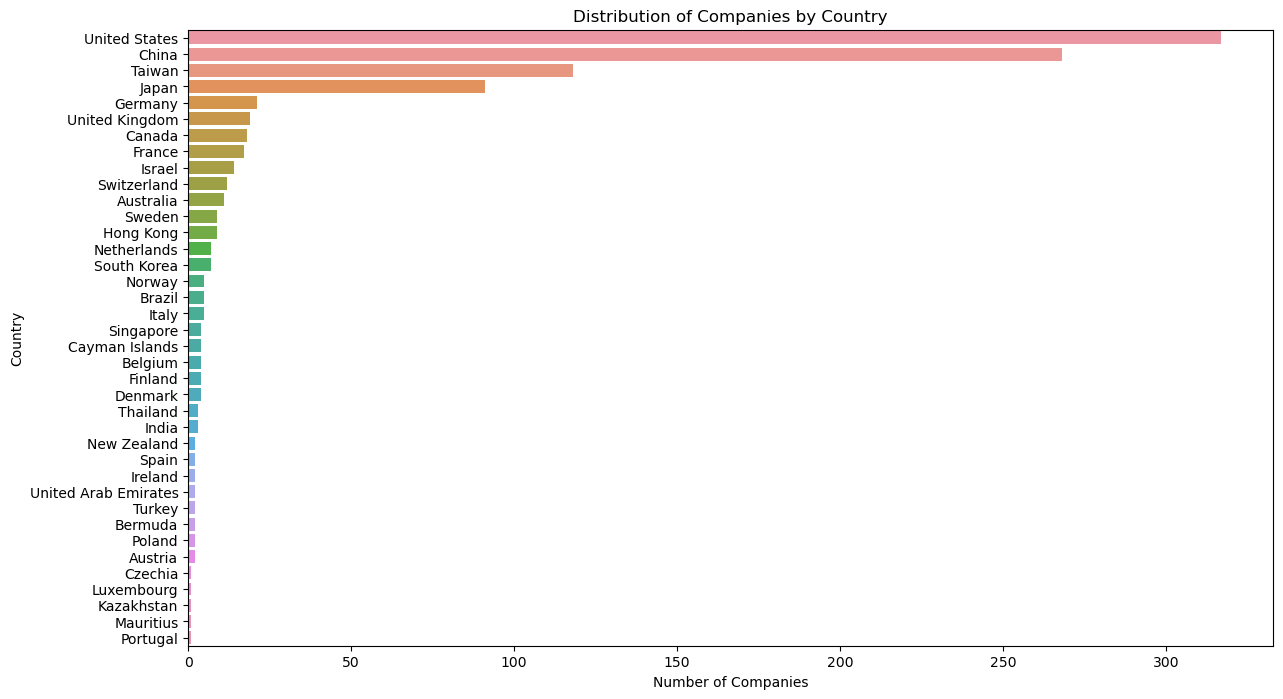

In [18]:
# Distribution of companies by country
plt.figure(figsize=(14, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Companies by Country')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.show()


# we can also get the top 10 

# the leading country in term of number of companies in the Tech space is the USA

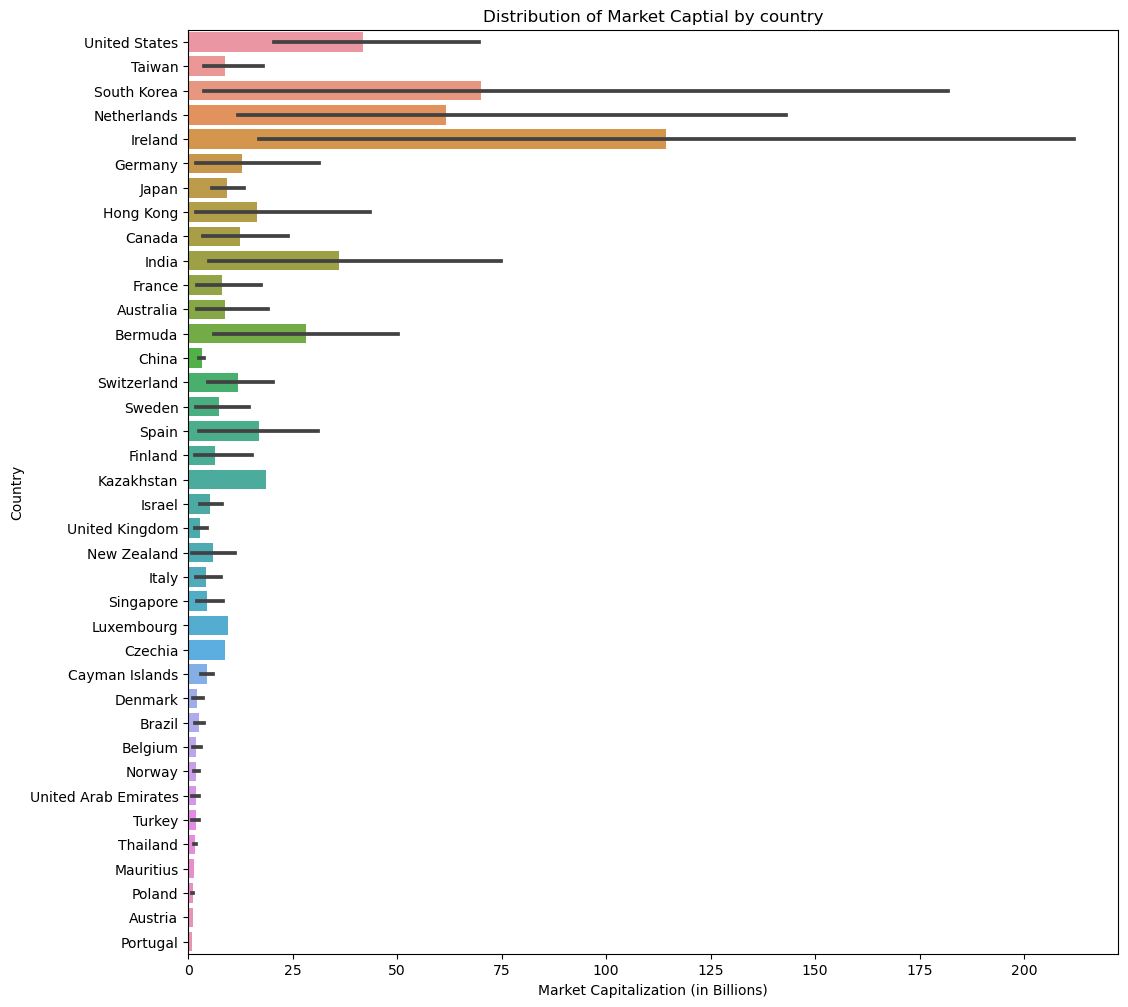

In [40]:
# Distribution of Market Captial by country

plt.figure(figsize=(12, 12))
sns.barplot(x='Market Cap Numeric', y='Country', data=df)
plt.title('Distribution of Market Captial by country')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Country')
plt.show()

# the leading country in term of Market Capital in the Tech space is Ireland

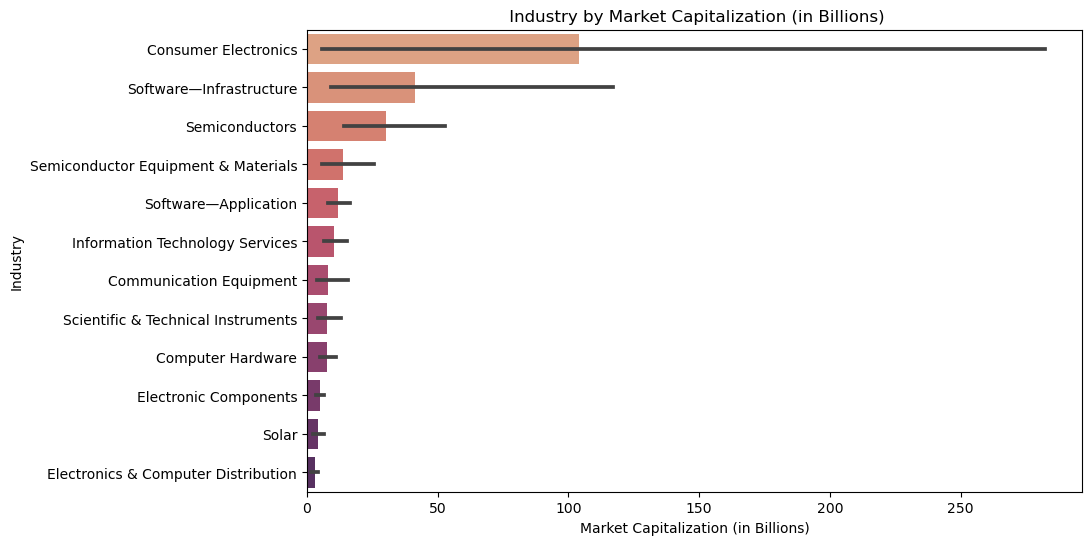

In [41]:
#Industry by Market Capitalization

plt.figure(figsize=(10, 6))
sns.barplot(x='Market Cap Numeric', y='Industry', data=df, palette='flare')
plt.title(' Industry by Market Capitalization (in Billions)')
plt.xlabel('Market Capitalization (in Billions)')
plt.ylabel('Industry')
plt.show()

# the leading sector in term of Market Cap is 'Consumer Electronics'

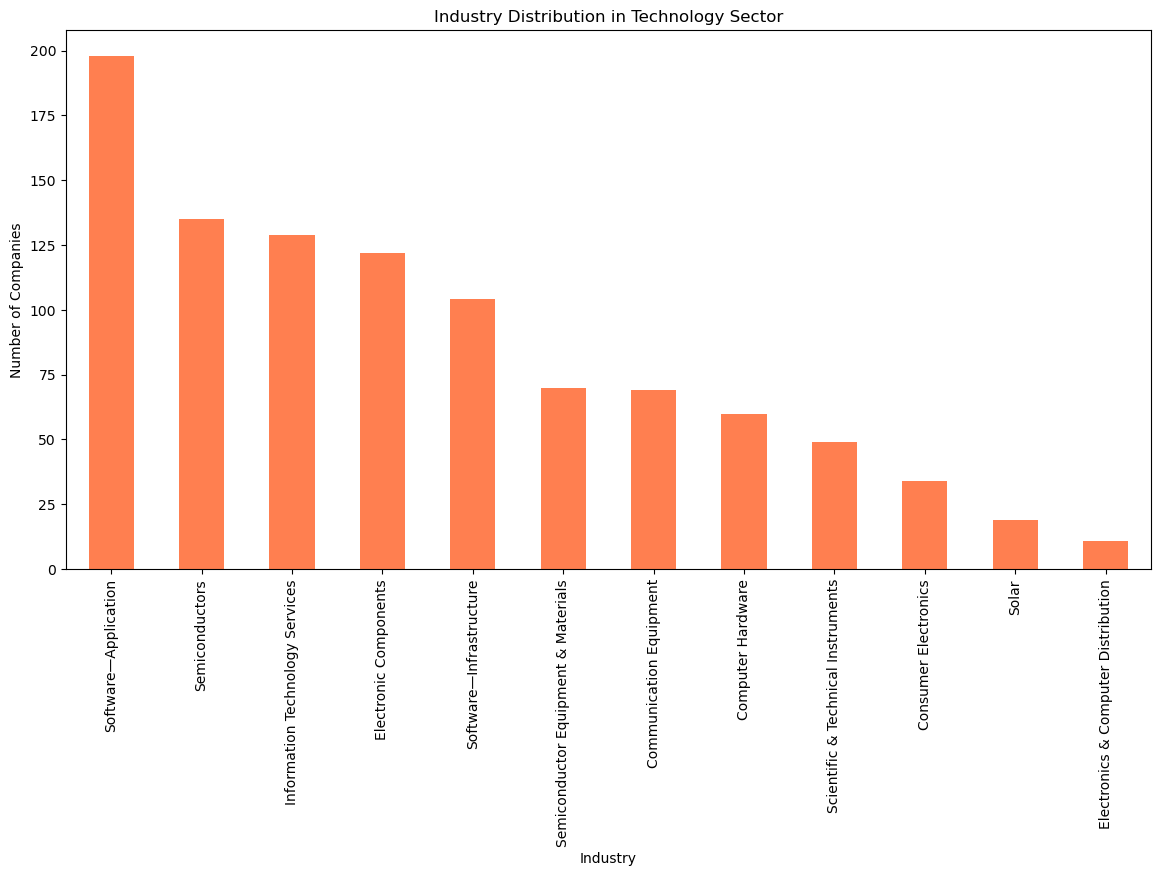

In [38]:
plt.figure(figsize=(14, 7))
tech_industries = df['Industry'].value_counts()
tech_industries.plot(kind='bar', color='coral')
plt.title('Industry Distribution in Technology Sector')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

# the leading sector in term of company numbers is 'Software'